In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
# Get or create a dataset
X,y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

# normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [3]:
# Add a columns of 1s for vectorization
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [4]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error (X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X, y, learning_rate =0.01, max_iters=300):
    n = X.shape[1]    # number of features
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        # Batch Gradient Descent -> Compute the Gradient wrt to entire dataset
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
    
    return theta, error_list

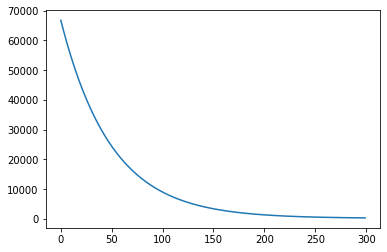

264.0832954333876


In [5]:
# Batch gradient descent for 300 iterations with learning rate 0.01
theta, error_list = gradient_descent(X,y)

plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

final_error = error_list[-1]
print(final_error)

In [6]:
# if batch size is 1, it becomes stochastic gradient descent
# if batch size is m, it becomes batch gradient descent

def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    data = np.hstack((X,y.reshape(-1,1)))     # stacking X and y in the same array

    for i in range(max_iters):
        # Mini Batch Gradient Descent 
        np.random.shuffle(data)   # shuffling the data to maintain randomness in the subset
        m = data.shape[0]  # total number of examples
        total_batches = m//batch_size
    
        # iterating over all the batches
        for i in range(total_batches):
        # picking one part of the data (i is batch_id)
            batch_data = data[i*batch_size : (i+1)*batch_size,:] 
        # extracting x values (will be all rows and columns except last column) from batch data 
            x_batch = batch_data[:,:-1]
        # extracting y values (will be all rows and last column) from batch data 
            y_batch = batch_data[:,-1]
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
    return theta, error_list

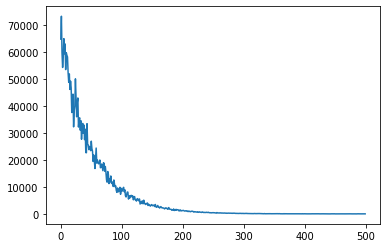

In [7]:
theta, error_list = batch_gradient_descent(X,y)

plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()
# the curve is noisy but convergence is really fast

In [8]:
final_error = error_list[-1]
print(final_error)

103.67149239769937


In [9]:
def stochastic_gradient_descent(X,y,batch_size=1,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    data = np.hstack((X,y.reshape(-1,1)))     # stacking X and y in the same array

    for i in range(max_iters):
        # Mini Batch Gradient Descent 
        np.random.shuffle(data)   # shuffling the data to maintain randomness in the subset
        m = data.shape[0]  # total number of examples
        total_batches = m//batch_size
    
        # iterating over all the batches
        for i in range(total_batches):
        # picking one part of the data (i is batch_id)
            batch_data = data[i*batch_size : (i+1)*batch_size,:] 
        # extracting x values (will be all rows and columns except last column) from batch data 
            x_batch = batch_data[:,:-1]
        # extracting y values (will be all rows and last column) from batch data 
            y_batch = batch_data[:,-1]
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
        
    return theta, error_list

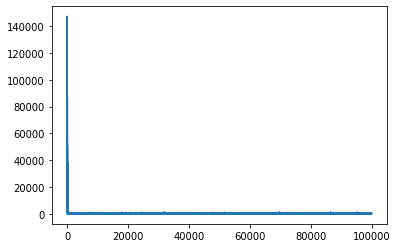

34.830355146596055


In [10]:
theta, error_list = stochastic_gradient_descent(X,y)

plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

final_error = error_list[-1]
print(final_error)